In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

data_path = 'data/'
symbols_path = 'symbols/'

In [2]:
def plot_gray(img):
    plt.imshow(img, vmin = 0, vmax = 255, cmap = 'gray')
    
def plot_color(img):
    plt.imshow(img)
    
def plot_in_window(img):
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
def resize(img):
    max_resolution = 1000
    rs_factor = max_resolution / max(data.shape)
    if rs_factor >= 1:
        return img
    return cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)

In [3]:
data = cv.imread(data_path + 'IMG_20191108_203448.jpg', cv.IMREAD_GRAYSCALE)
rs_factor = 1500 / max(data.shape)
data = cv.resize(data, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)

In [4]:
def get_contour(img):
    _, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    return contours[np.argmax([cv.contourArea(c) for c in contours])]

In [5]:
symbol_paths = ['Quarter-Note/1.png', 'Eighth-Note/2.png', 'Sharp/1.png', 'Note-Heads/1.png', 'Note-Heads/3.png']
symbols = []
for s in symbol_paths:
    symbol = cv.imread(symbols_path + s, cv.IMREAD_GRAYSCALE)
    #_, symbol = cv.threshold(symbol, 127, 255, cv.THRESH_BINARY_INV)
    symbols.append(symbol)

In [6]:
img = data.copy()
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)
plot_in_window(img)

In [186]:
#img2 = cv.resize(img, None, fx = 1/2, fy = 1/2, interpolation = cv.INTER_AREA)
img = data.copy()
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
lines = cv.HoughLines(img, 1, np.pi / 180, 460)
print(len(lines))
img3 = np.full(img.shape, 255, dtype = np.uint8)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img3,(x1,y1),(x2,y2), 0,1)

img = cv.bitwise_and(img, img3)
plt.figure(figsize = (15, 20))
plot_in_window(img)

50


<Figure size 1080x1440 with 0 Axes>

In [98]:
def measure(c):
    _, s, _ = cv.minAreaRect(c)
    return cv.contourArea(c) / ( s[0] * s[1] )

In [ ]:
img = data.copy()
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)
contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
img3 = cv.cvtColor(data, cv.COLOR_GRAY2RGB)

for i, contour in enumerate(contours):
    if len(contour) > 2:
        val = [cv.matchShapes(contour, s, cv.CONTOURS_MATCH_I3, 0) for s in symbols]
        #val = [np.abs(measure(contour) - measure(s)) for s in symbols]
        print(val)
        color = [0, 0, 0]
        color[np.argmin(val)] = 255;
        cv.drawContours(img3, contours, i, color, 1)

plot_in_window(img3)

In [28]:
plot_in_window(img)

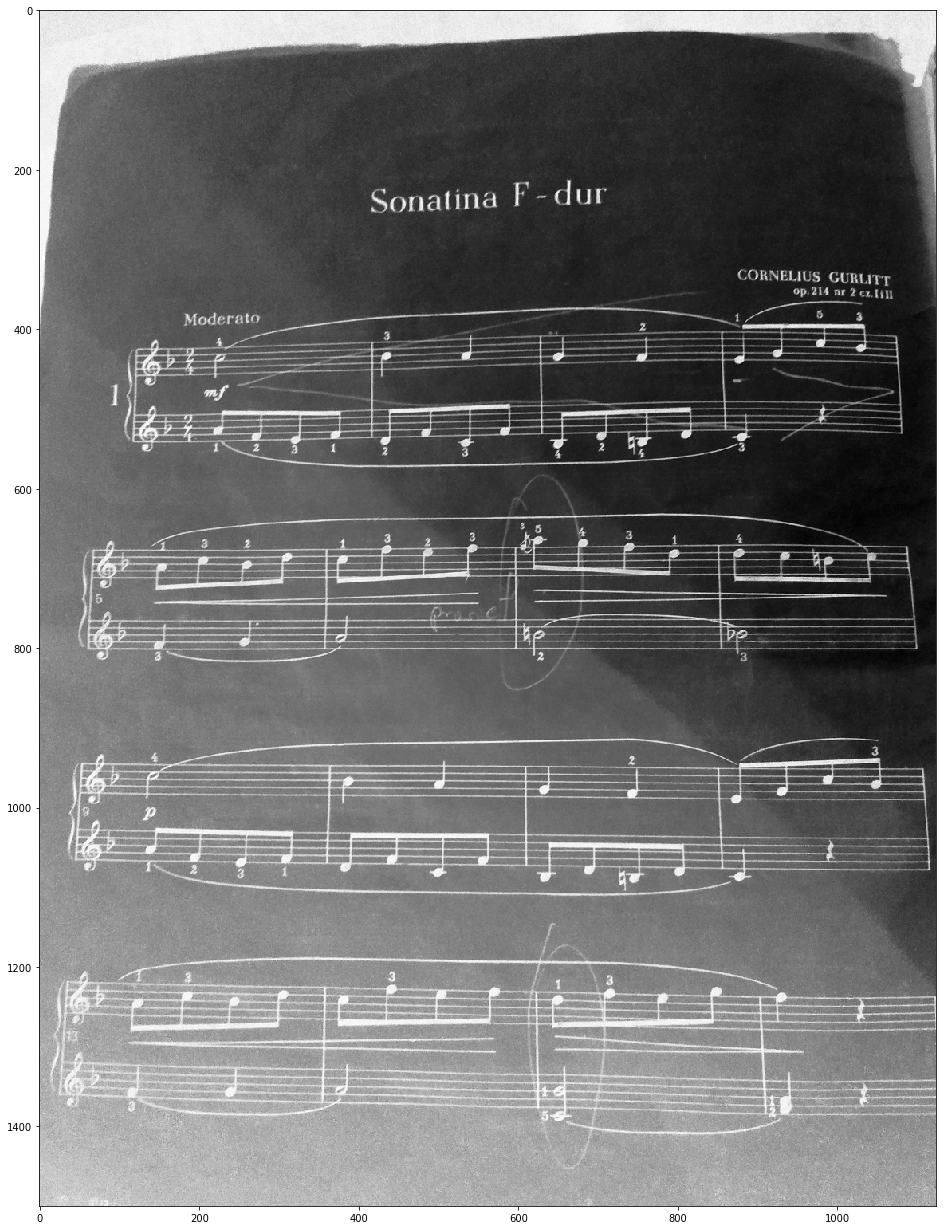

1500 1125 0.0 0.0


IndexError: index 1500 is out of bounds for axis 0 with size 1500

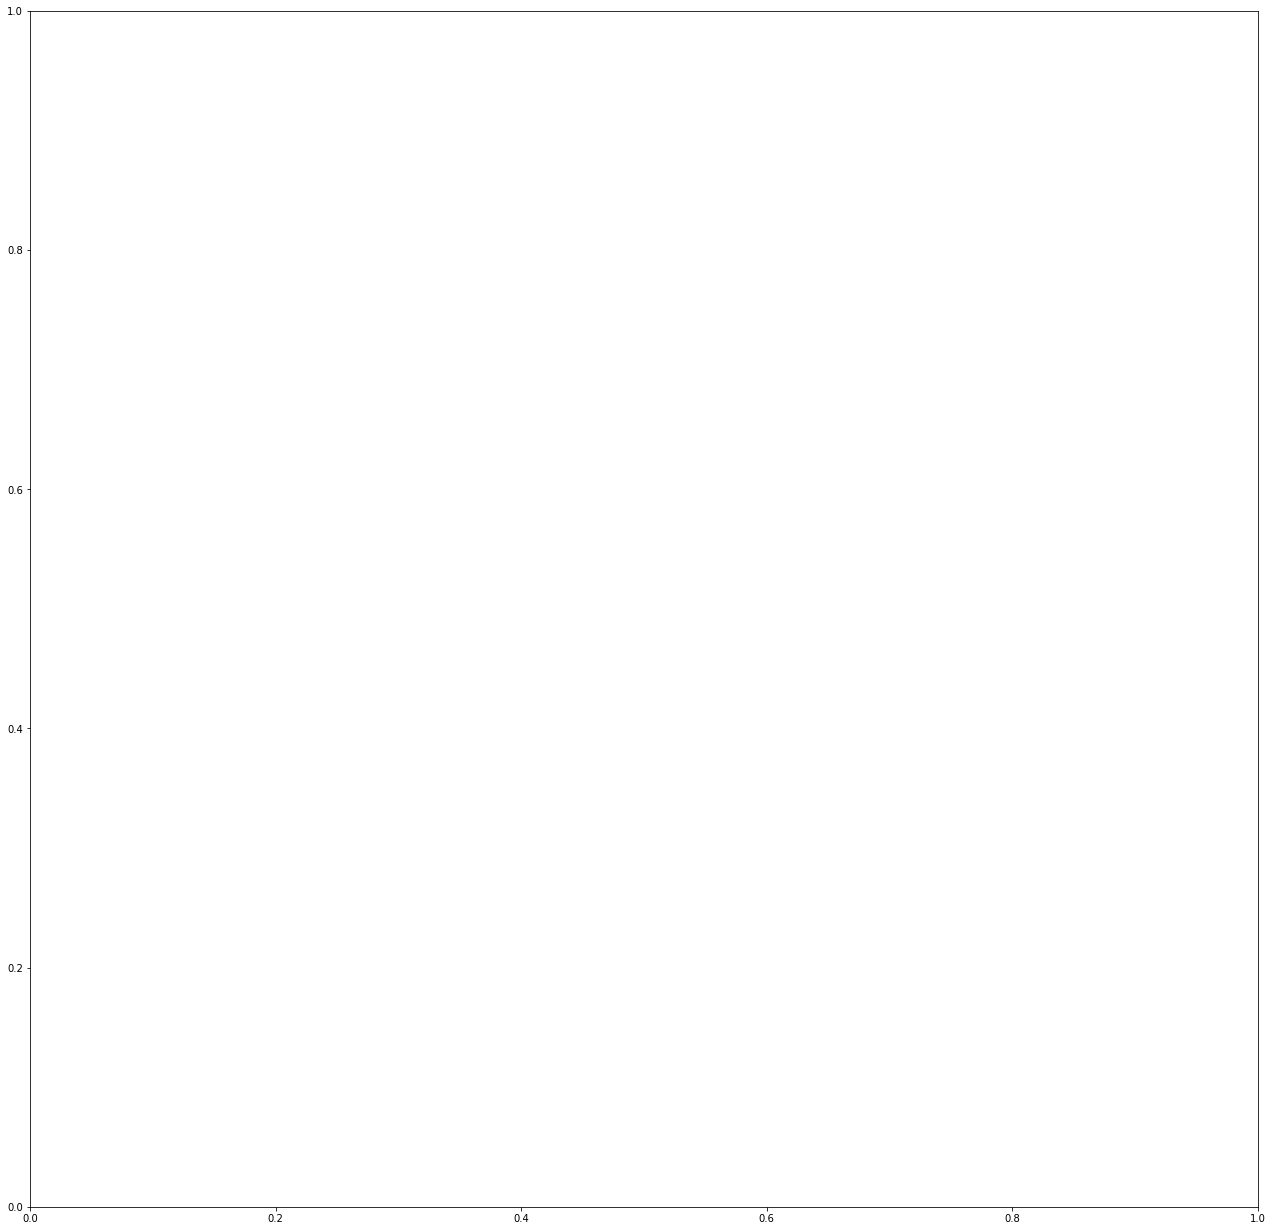

In [36]:
img, staff_lines = remove_staff_lines(data)

In [29]:
(staff_lines[4][0] - staff_lines[0][0])/4 * 1.25

19.687031835205993

In [30]:
staff_width = (staff_lines[4][0] - staff_lines[0][0])/4 * 1.25
#staff_width = 10

rs_factor = staff_width / symbols[3].shape[0]
note_head = cv.resize(~symbols[3], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
#_, note_head = cv.threshold(note_head, 127, 255, cv.THRESH_BINARY_INV)

rs_factor = staff_width / symbols[4].shape[0]
note_head_empty = cv.resize(~symbols[4], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
#_, note_head_empty = cv.threshold(note_head_empty, 127, 255, cv.THRESH_BINARY_INV)

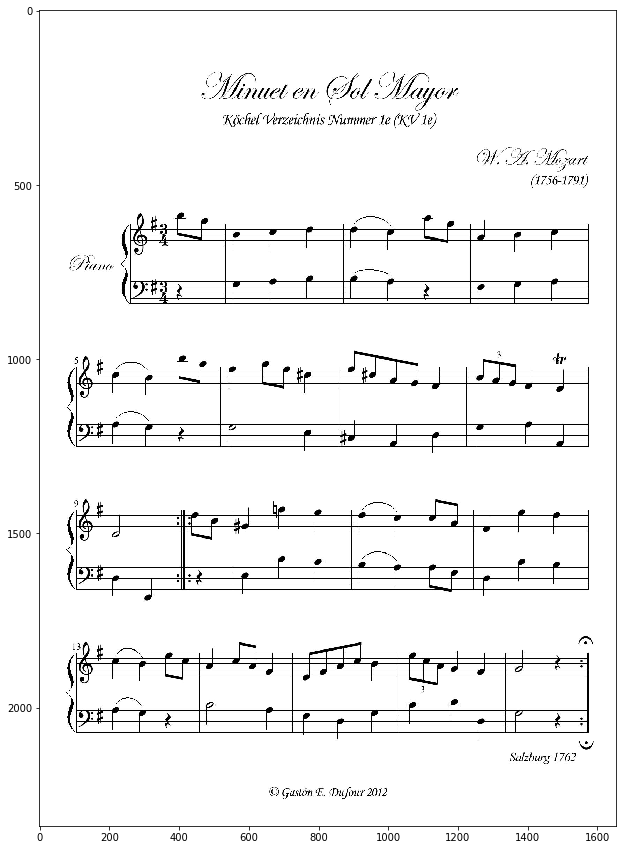

In [22]:
plt.figure(figsize = (15, 15))
plt.imshow(data, cmap = 'gray')

In [23]:
#img, _ = remove_staff_lines(data)
img_color = cv.cvtColor(data, cv.COLOR_GRAY2RGB)
result = cv.matchTemplate(img, note_head, method = cv.TM_SQDIFF_NORMED)

th = 0.3
result = result < th
h, w = note_head.shape
noteheads = np.nonzero(result)
for p in zip(noteheads[1], noteheads[0]):
    img_color = cv.rectangle(img_color, p, (p[0] + w, p[1] + h), (0, 255, 0), 1)
    
    
result = cv.matchTemplate(img, note_head_empty, method = cv.TM_SQDIFF_NORMED)
th = 0.6
result = result < th

h, w = note_head_empty.shape
noteheads = np.nonzero(result)
for p in zip(noteheads[1], noteheads[0]):
    img_color = cv.rectangle(img_color, p, (p[0] + w, p[1] + h), (255, 0, 0), 1)

plot_in_window(img_color)

In [98]:
plot_in_window(img)

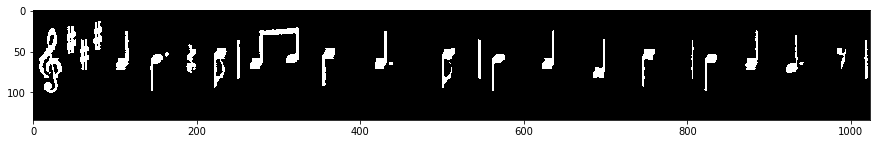

In [133]:
plt.figure(figsize = (15, 20))
plot_gray(img)

In [10]:
data.shape

(134, 1024)

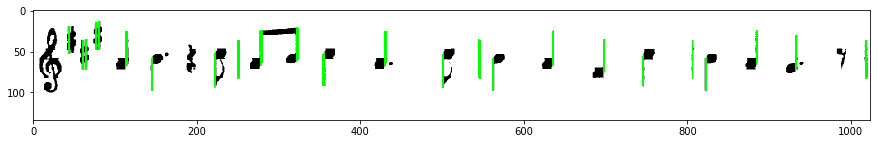

In [33]:
img = data.copy()
img_color = cv.cvtColor(data, cv.COLOR_GRAY2RGB)
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)

result = cv.reduce(img, 0, cv.REDUCE_AVG)

staff_height = 50
th  = 0.25
for i, v in enumerate(result[0]/255):
    nz = np.nonzero(img[:,i])
    if (v > th):
        white = np.sum(img[nz[0][0]:nz[0][-1],i] == 0)
        if white < 10:
            img_color = cv.line(img_color, (i, nz[0][0]), (i, nz[0][-1]), (0, 255, 0))

plt.figure(figsize = (15, 8))
plt.imshow(img_color)
#plt.bar(range(0, len(result[0])), result[0]/255, width = 10)
#plt.xlim(0, data.shape[1])

In [134]:
np.max(result[0]/255)

0.43137254901960786

In [3]:
# Convert pdfs to jpgs
from pdf2image import convert_from_path
from os import listdir

for file in listdir(data_path):
    if file.endswith('.pdf'):
        img = convert_from_path(file)
        name = file.split('.')[0]
        for page in img:
            page.save(data_path + name + '.jpg')

In [20]:
# Resize jpgs
from os import listdir

for file in listdir('nowe/'):
    print(file)
    if file.endswith('.jpg'):
        img = cv.imread('nowe/' + file)
        if max(img.shape) > 1500:
            rs_factor = 1500 / max(img.shape)
            img = cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
            
        print('Saving', file)
        if not cv.imwrite('./data_smaller/' + file, img):
            print('Error writing image')

IMG_20191110_172712.jpg
Saving IMG_20191110_172712.jpg
IMG_20191110_172543.jpg
Saving IMG_20191110_172543.jpg
IMG_20191110_172649.jpg
Saving IMG_20191110_172649.jpg
IMG_20191110_172824.jpg
Saving IMG_20191110_172824.jpg
IMG_20191110_172548.jpg
Saving IMG_20191110_172548.jpg
IMG_20191110_172654.jpg
Saving IMG_20191110_172654.jpg
IMG_20191110_172539.jpg
Saving IMG_20191110_172539.jpg
IMG_20191110_172751.jpg
Saving IMG_20191110_172751.jpg
IMG_20191110_172533.jpg
Saving IMG_20191110_172533.jpg
IMG_20191110_172700.jpg
Saving IMG_20191110_172700.jpg


In [6]:
def remove_staff_lines(input_img):
    #Bierze imidż zarotowany równolegle do górnej krawędzi obrazka
    def distinct(arr):
        st=sorted(arr, key=lambda x:x[0])
        j=0
        dist=1
        while (j<len(arr)):
            if (0.8*arr[0][1]>arr[j][1]):
                break
            if (j>0 and arr[j][0]-arr[j-1][0]>3):
                dist+=1
            j+=1
        return (1 if dist>=5 else 0)



    def blackening(bwimg, pathway_of_decay):
        s, t, gr=0, 0, 0
        for i in range(len(pathway_of_decay)):
            if (bwimg[pathway_of_decay[i][0]+3, pathway_of_decay[i][1]]==255 and bwimg[pathway_of_decay[i][0]-3, pathway_of_decay[i][1]]):
                t+=1
                for j in range(5):
                    if (bwimg[pathway_of_decay[i][0]-2+j, pathway_of_decay[i][1]]==0):
                        s=s+j-2
                        gr+=1

                bwimg[pathway_of_decay[i][0], pathway_of_decay[i][1]]=255
                bwimg[pathway_of_decay[i][0]-1, pathway_of_decay[i][1]]=255
                bwimg[pathway_of_decay[i][0]+1, pathway_of_decay[i][1]]=255
                bwimg[pathway_of_decay[i][0]-2, pathway_of_decay[i][1]]=255
                bwimg[pathway_of_decay[i][0]+2, pathway_of_decay[i][1]]=255
        if (t>0):
            s=s/t
            gr=gr/t
        return (pathway_of_decay[i][0]+s, gr)

    def pathfinder(bwimg, fals, dead, yla, ylc, x):
        slain=0
        im=bwimg[yla:ylc+1,x]
        if (im[1]==255 and (im[0]==0 or im[2]==0)):
            fals+=1
            dead=0
        elif(im[1]==255):
            dead+=1
        else:
            fals, dead=0, 0

        if (fals==3):
            fals=0
            if (im[0]==0):
                yla, ylc=yla-1, ylc-1
            else:
                yla, ylc=yla+1, ylc+1
        if (dead==20):
            dead=0
            slain=1
        return(fals, dead, slain, yla, ylc)

    def findlinez(bwimg):
        y=0
        x1=bwimg.shape[1]//2-2
        x2=bwimg.shape[1]//2+2
        solution=[]

        while (y<bwimg.shape[0]):
            vs=bwimg[y,x1:x2+1]
            if (0 in vs):
                xl=bwimg.shape[1]//2
                yla, ylc=y-1, y+1
                xr=xl

                pathway=[]
                fals, dead, slain=0, 0, 0
                while (xl>0):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xl)
                    pathway.append((yla+1, xl))
                    if (slain==1):
                        break
                    xl-=1

                fals, dead, slain=0, 0, 0
                yla, ylc=y-1, y+1
                while (xr<bwimg.shape[1]):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xr)
                    pathway.append((yla+1, xr))
                    if (slain==1):
                        break
                    xr+=1
                if (xr-xl>1000):
                    sv, gr=blackening(bwimg, pathway)
                    solution.append((sv, gr, xl, xr))

            y+=1
        return solution


    kernel=[0]*10
    #kernele do grafiki
    kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
    kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
    kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
    kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
    kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
    kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
    dm=(7,7)
    kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
    kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

    ###BINARIZATION
    img=input_img.copy()
    mg=cv.filter2D(img, -1, kernel[5])
    mg2=cv.filter2D(img, -1, kernel[4])
    #mg=cv.filter2D(mg, -1, kernel[5])
    im2=cv.filter2D(mg, -1, kernel[2])
    im3=cv.filter2D(mg2, -1, kernel[1])
    #grave(im2, 1)
    #grave(im3, 1)
    im4=cv.filter2D(im3, -1, kernel[7])
    #grave(im4, 1)

    img2=cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 145, 1)
    #img2[im4<140]=255
    #grave(img2, 1)
    #grave(img, 1)



    ###Linez - Only horizontal hier - to będzie później
    ##
    ##

    fig, ax=plt.subplots(1,1,figsize=(22,22))    
    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()

    ###DETECTION
    fig, ax=plt.subplots(1,1,figsize=(22,22))
    sol=findlinez(img2)
    #sol - lista tupli - 1-wszy to uśrednione miejsce linii pięciolinii, 2-gi to grubość linii
    print('kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec')
    for x in sol:
        ax.axhline(x[0], color=(1,0,0))
        print(x)
    print('liczba liń z pięcioliń: {} (jak podzielna przez 5 to pewnie się zgadza)'.format(len(sol)))

    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()


    fig, ax=plt.subplots(1,1,figsize=(22,22))
    ax.imshow(img2, vmin = 0, vmax = 255, cmap='Greys',  interpolation='nearest')
    plt.show()
    
    return ~img2, sol

In [26]:
def remove_staff_lines(input_img):
    def binarization(bwimg):
        kernel=[0]*10
        #kernele do grafiki
        kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
        kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
        kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
        kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
        kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
        kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
        dm=(7,7)
        kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
        kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

        mg2=cv.filter2D(bwimg, -1, kernel[4])
        im3=cv.filter2D(mg2, -1, kernel[1])
        im4=cv.filter2D(im3, -1, kernel[7])

        return cv.adaptiveThreshold(bwimg, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 145, 1)

    def blackening(bwimg, path):
        s, t, gr=0, 0, 0
        st=[0]*20
        dep=[0]*len(path)
        end1=[0]*len(path)
        end2=[0]*len(path)

        for i in range(len(path)):
            s1v=bwimg[path[i][0]-10:path[i][0]+10, path[i][1]] if (path[i][0]+10<bwimg.shape[0] and path[i][0]-10>=0) else 0
            for ij in range(0, -10, -1):
                a, b=path[i][0]+ij, path[i][1]
                if (bwimg[a,b]==255):
                    break
            end1[i]=ij

            for ij in range(1, 10, 1):
                a, b=path[i][0]+ij, path[i][1]
                if (bwimg[a,b]==255):
                    break
            end2[i]=ij

            dep[i]=end2[i]-end1[i]
        ld=len(dep)
        dep2=sorted(dep)
        small=dep2[math.floor(0.1*ld)]
        large=dep2[math.floor(0.9*ld)]

        dep2=dep2[math.floor(0.1*ld):math.floor(0.9*ld)]
        grub=sum(dep2)/len(dep2)-2

        midian=[0]*len(path)
        cur=0
        last=0
        midian[0]=path[0][0]
        for i in range(1, len(path)):
            if (dep[i]>grub+1):
                cur+=1
                continue
            else:
                midian[i]=path[i][0]+(end2[i]+end1[i])//2
                while (cur>0):
                    p=path[i][0]-cur
                    midian[i-cur]=midian[i] if (cur<p-last) else midian[last]
                    tv=midian[i-cur]
                    jj=1
                    while (bwimg[tv, path[i-cur][1]]==255):
                        tv=tv+jj
                        jj=-jj-1*jj//abs(jj) 
                    midian[i-cur]=tv
                    cur-=1
                last=i

        dt0=math.ceil(grub)
        for i in range(len(path)):
            sc, t1, t2=0, 0, 0
            for jj in range(1, 10):
                if (bwimg[midian[i]+jj, path[i][1]]==255):
                    break
            t1=jj
            for jj in range(0, -10, -1):
                if (bwimg[midian[i]+jj, path[i][1]]==255):
                    break
            t2=jj
            sc=t1-t2

            if (sc<=dt0+3):
                for jj in range(t2, t1+1, 1):
                    bwimg[midian[i]+jj, path[i][1]]=255

        return (sum(midian)/len(midian), grub)


    def pathfinder(bwimg, fals, dead, yla, ylc, x):
        slain=0
        im=bwimg[yla:ylc+1,x]
        if (len(im)==2):
            print(yla, ylc, im, bwimg.shape)

        if (im[1]==255 and (im[0]==0 or im[2]==0)):
            fals+=1
            dead=0
        elif(im[1]==255):
            dead+=1
        else:
            fals, dead=0, 0

        if (fals==3):
            fals=0
            if (im[0]==0):
                yla, ylc=yla-1, ylc-1
            else:
                yla, ylc=yla+1, ylc+1
        if (dead==8):
            dead=0
            slain=1
        return(fals, dead, slain, yla, ylc)


    def findlinez(bwimg, shp):
        y=1
        x1=bwimg.shape[1]//2-2
        x2=bwimg.shape[1]//2+2
        solution=[]

        while (y<bwimg.shape[0]-1):
            vs=bwimg[y,x1:x2+1]
            if (0 in vs):
                xl=bwimg.shape[1]//2
                yla, ylc=y-1, y+1
                xr=xl

                pathway=[]
                fals, dead, slain=0, 0, 0
                while (xl>0):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xl)
                    pathway.append((yla+1, xl))
                    if (slain==1 or yla==-1 or ylc>=bwimg.shape[0]):
                        break
                    xl-=1

                fals, dead, slain=0, 0, 0
                yla, ylc=y-1, y+1
                pathway=pathway[::-1]

                """
                for i,x in enumerate(pathway):
                    if (i==0):
                        continue
                    if (bwimg[pathway[i][0],pathway[i][1]]==255):
                        if (bwimg[pathway[i-1][0],pathway[i][1]]==0):
                            pathway[i][0]=pathway[i-1][0]
                        else:
                            tv=pathway[i][0]
                            while (bwimg[tv, pathway[i][1]]==255):
                                tv=tv+jj
                                jj=-jj-1*jj//abs(jj)                             
                            cur-=1
                """

                while (xr<bwimg.shape[1]):
                    fals, dead, slain, yla, ylc=pathfinder(bwimg, fals, dead, yla, ylc, xr)
                    pathway.append((yla+1, xr))
                    if (slain==1 or yla==-1 or ylc>=bwimg.shape[0]):
                        break
                    xr+=1


                if (xr-xl>shp[1]*0.3):
                    sv, gr=blackening(bwimg, pathway)
                    solution.append((sv, gr, xl, xr))
            y+=1
        return solution

    def rotate_image(img):
        minLineLength = 200
        maxLineGap = 10

        kern=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
        edges = cv.Canny(img,50,150,apertureSize = 3)

        lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

        cosa=[0]*len(lines)
        sina=[0]*len(lines)
        for i, iv in enumerate(lines):
            x1,y1,x2,y2=iv[0]
            if (x2<x1 or (x2==x1 and y2<y1)):
                f1, f2=x1, y1
                x1, y1=x2, y2
                x2, y2=x1, y1

            dx, dy=(x2-x1), (y2-y1)

            if (dx*dx+dy*dy>0):
                cosa[i]=dy/math.sqrt(dy*dy+dx*dx)
            else:
                cosa[i]=0
            #cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)

        x=0
        blyat=[0]*210
        for i in range(len(cosa)):
            s=math.floor(cosa[i]*100)+100
            blyat[s]+=1
            if (blyat[s]>blyat[x]):
                x=s
        x=(x-100)/100
        #x2=np.mean(sina[i:n])

        angle=90-math.acos(x)*(180/math.pi)

        h, w = img.shape[:2]
        print(h, w, angle, x)
        image_center = (w/2, h/2)

        rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1)

        radians = math.radians(angle)
        sin = math.sin(radians)
        cos = math.cos(radians)
        bound_w = int((h*abs(sin)) + (w*abs(cos)))
        bound_h = int((h*abs(cos)) + (w*abs(sin)))

        rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
        rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

        rotated_mat = cv.warpAffine(img, rotation_mat, (bound_w, bound_h), borderValue=255)
        return rotated_mat
    
    def grave(img, biw=0):
        fig, ax=plt.subplots(1,1,figsize=(22,22))
        if (biw==1):
            ax.imshow(img, cmap='Greys',  interpolation='nearest')
        else:
            ax.imshow(img)
        plt.show()
        return

    def decorate(i):
        print()
        print('#'*30+'   '+str(i)+'   '+'#'*30)
        print()


    #for i in range(j):
    #decorate(i)
    imgb=input_img
    grave(imgb, 1)
    shorig=imgb.shape

    ###BINARIZATION
    imv=binarization(imgb)   
    #Rotacja po linii - czasem jeszcze nie działa
    img2=rotate_image(imv)

    ###DETECTION
    fig, ax=plt.subplots(1,1,figsize=(22,22))    
    sol=findlinez(img2, shorig)
    print(img2)
    #sol - lista tupli - 1-wszy to uśrednione miejsce linii pięciolinii, 2-gi to grubość linii
    print('kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec')
    for x in sol:
        ax.axhline(x[0], color=(1,0,0))
        print(x)
    print('liczba liń z pięcioliń: {} (jak podzielna przez 5 to pewnie się zgadza)'.format(len(sol)))

    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()

    grave(img2, 1)
    return ~img2, sol